<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

/tmp/ipykernel_41848/451024427.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
select count(*) from public.vacancies
'''

In [5]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1, connection)
display(df_3_1.loc[0, 'count'])

/tmp/ipykernel_41848/368957683.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1, connection)


49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
select count(*) from public.employers
'''

In [7]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2, connection)
display(df_3_2.loc[0, 'count'])

/tmp/ipykernel_41848/776937339.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2, connection)


23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
select count(*) from public.areas
'''

In [9]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3, connection)
display(df_3_3.loc[0, 'count'])

/tmp/ipykernel_41848/1675876537.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3, connection)


1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4= f'''
select count(*) from public.industries
'''

In [11]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4, connection)
display(df_3_4.loc[0, 'count'])

/tmp/ipykernel_41848/3032644533.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4, connection)


294

***

# выводы по предварительному анализу данных
В базе данных у нас всего 49197 вакански от 23501 работодаталей. 
Из этих данных понятно, что в среднем на каждого работодателя приходится по 2-3 вакансии.

Вакансии представлены с 1362 регионов. Очевидно, что выборка вакансий была собрана из разных стран.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''
select a.name area, count(v.id) cnt from public.vacancies v
left join public.areas a on a.id = v.area_id
group by a.name
order by cnt desc
limit 5
'''

In [13]:
# результат запроса
df_4_1 = pd.read_sql_query(query_4_1, connection)
display(df_4_1)

/tmp/ipykernel_41848/3084987771.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1 = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''
select count(id) from public.vacancies
where salary_from is not null or salary_to is not null
'''

In [15]:
# результат запроса
df_4_2 = pd.read_sql_query(query_4_2, connection)
display(df_4_2.loc[0, 'count'])

/tmp/ipykernel_41848/1325849733.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2 = pd.read_sql_query(query_4_2, connection)


24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''
select round(avg(salary_from)) avg_salary from public.vacancies
union all
select round(avg(salary_to)) from public.vacancies
'''

In [17]:
# результат запроса
df_4_3 = pd.read_sql_query(query_4_3, connection)
display(df_4_3)

/tmp/ipykernel_41848/3635315011.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3 = pd.read_sql_query(query_4_3, connection)


,avg_salary
0,71065.0
1,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''
select schedule, employment, count(id) count from public.vacancies
group by schedule, employment
order by count desc
'''

In [19]:
# результат запроса
df_4_4 = pd.read_sql_query(query_4_4, connection)
display(df_4_4)

/tmp/ipykernel_41848/972204354.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4 = pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''
select experience, count(id) count from public.vacancies
group by experience
order by count
'''

In [21]:
# результат запроса
df_4_5 = pd.read_sql_query(query_4_5, connection)
display(df_4_5)

/tmp/ipykernel_41848/1393685526.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5 = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# выводы по детальному анализу вакансий
Больше всего вакансий, ожидаемо, в Москве и Санкт-Петербурге. 
Около половины вакансий заполнены без указания зарплатной вилки (указанов в 24073 из 49197).

В среднем зарплатная вилка стартрует с 71000 до 110000 руб. Для регионов это довольно крупные цифры. 
На средние значения повлияли вакансии, выставленные в Москве и Санкт-Петербурге, где находиться большинство  вакансий.

Основные вакансии направлены на кандидатова имеющие 1-3 года работы или от 3 до 6 лет.

Подавляющее большинствой вакансий направлено на найм сотрудников в офис ( комбинация Полный день Полная занятость). Второй по популярности идет формат удаленной работы на основе полной занятости.


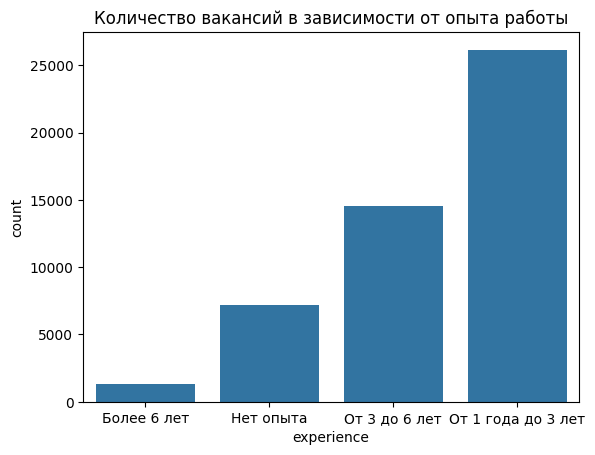

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение столбчатой диаграммы
sns.barplot(x="experience", y="count", data=df_4_5)

# Добавление названия графика
plt.title("Количество вакансий в зависимости от опыта работы")

# Отображение графика
plt.show()

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
# текст запроса
query_5_1 = f'''
(select e.name, count(v.id) count from public.vacancies v
left join public.employers e on e.id=v.employer_id
group by e.name
order by count desc
limit 1)
union all
(select e.name, count(v.id) count from public.vacancies v
left join public.employers e on e.id=v.employer_id
group by e.name
order by count desc
limit 1
offset 4)
'''

In [24]:
# результат запроса
df_5_1 = pd.read_sql_query(query_5_1, connection)
display(df_5_1)

/tmp/ipykernel_41848/3282492979.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1 = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
# текст запроса
query_5_2 = f'''
select a.name, count(v.id) v_count, count(e.id) e_count from public.areas a
left join public.vacancies v on v.area_id=a.id
left join public.employers e on e.area=a.id
group by a.name
having count(v.id) = 0
order by e_count desc
limit 1
'''

In [26]:
# результат запроса
df_5_2 = pd.read_sql_query(query_5_2, connection)
display(df_5_2)

/tmp/ipykernel_41848/2659449573.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2 = pd.read_sql_query(query_5_2, connection)


,name,v_count,e_count
0,Россия,0,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# текст запроса
query_5_3 = f'''
select e.name, count(distinct v.area_id) from public.vacancies v
left join public.employers e on v.employer_id=e.id
group by e.name
order by count desc
'''

In [28]:
# результат запроса
df_5_3 = pd.read_sql_query(query_5_3, connection)
display(df_5_3)

/tmp/ipykernel_41848/1820345300.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3 = pd.read_sql_query(query_5_3, connection)


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# текст запроса
query_5_4 = f'''
WITH excluded_ids AS (
    SELECT id FROM public.employers
    EXCEPT
    SELECT DISTINCT employer_id FROM public.employers_industries
)
SELECT count(id) FROM excluded_ids;

'''

In [30]:
# результат запроса
df_5_4 = pd.read_sql_query(query_5_4, connection)
display(df_5_4)

/tmp/ipykernel_41848/1129921700.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4 = pd.read_sql_query(query_5_4, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
# текст запроса
query_5_5 = f'''
select e.name from public.employers_industries i
left join public.employers e on e.id=i.employer_id
group by e.name
having count(i.industry_id) = 4
order by e.name
limit 1
offset 2
'''

In [32]:
# результат запроса
df_5_5 = pd.read_sql_query(query_5_5, connection)
display(df_5_5)

/tmp/ipykernel_41848/1992736659.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5 = pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
# текст запроса
query_5_6 = f'''
select count(*) from public.employers_industries ei
left join public.industries i on i.id=ei.industry_id
where i.name = 'Разработка программного обеспечения'
'''

In [34]:
# результат запроса
df_5_6 = pd.read_sql_query(query_5_6, connection)
display(df_5_6)

/tmp/ipykernel_41848/14767730.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6 = pd.read_sql_query(query_5_6, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
page = BeautifulSoup(response.text, 'html.parser')
rows = page.find('table').find('tbody').find_all('tr')

millions = []

for row in rows:
    cols = row.find_all('td')
    if(len(cols) > 0):
        millions.append(cols[1].text)
print(millions)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [36]:
# текст запроса
query_5_7 = f'''
select a.name, count(*) cnt from public.employers e
left join public.vacancies v on v.employer_id = e.id
left join public.areas a on a.id = v.area_id
where e.name='Яндекс' and a.name in {tuple(millions)}
group by a.name
union all
select 'Total', count(*) from public.employers e
left join public.vacancies v on v.employer_id = e.id
left join public.areas a on a.id = v.area_id
where e.name='Яндекс' and a.name in {tuple(millions)}
order by cnt
'''

In [37]:
# результат запроса
df_5_7 = pd.read_sql_query(query_5_7, connection)
display(df_5_7)

/tmp/ipykernel_41848/796585636.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7 = pd.read_sql_query(query_5_7, connection)


,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

# выводы по анализу работодателей
Самое большее число вакансий выпускает компания Яндекс. Он разместил 485 вакансий в городах миллионниках (около 25%).

Самое большее число работодаталей без вакансий зарегестрировано в России. 
Связано это с тем, что в России находятся крупгейшие города - Москва и Санкт-Петербург.
Работодатели без вакансий, возможно, это государственные органы или некоммерческие организации.


Из 23501 работодателей 3553 занимаются разработкой ПО.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
# текст запроса
query_6_1 = f'''
select count(*) from public.vacancies 
where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [39]:
# результат запроса
df_6_1 = pd.read_sql_query(query_6_1, connection)
display(df_6_1)

/tmp/ipykernel_41848/452750148.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1 = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
# текст запроса
query_6_2 = f'''
select count(*) from public.vacancies 
where 
(
lower(name) like '%data science%' 
or lower(name) like '%data scientist%'
or lower(name) like '%исследователь данных%'
or lower (name) like '%machine learning%'
or lower(name) like '%машинн%обучен%'
or name like '%ML%' and name not like '%HTML%'
)
and 
(
lower(name) like '%junior%' 
or experience = 'Нет опыта'
or employment = 'Стажировка'
)
'''

In [41]:
# результат запроса
df_6_2 = pd.read_sql_query(query_6_2, connection)
display(df_6_2)

/tmp/ipykernel_41848/265335090.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2 = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
# текст запроса
query_6_3 = f'''SELECT count(*) as n_vac
                FROM public.vacancies
                WHERE (lower(name) LIKE '%data scientist%' 
                or lower(name) LIKE '%data science%' 
                or lower(name) LIKE '%исследователь данных%' 
                or lower(name) LIKE '%ml%' and name NOT LIKE '%HTML%' and name not like '%QML%'
                or lower(name) LIKE '%machine learning%' 
                or lower(name) LIKE '%машинн%обучен%') 
                and(lower(key_skills) LIKE '%postgres%'
                or lower(key_skills) LIKE '%sql%')
             '''

In [43]:
# результат запроса
df_6_3 = pd.read_sql_query(query_6_3, connection)
display(df_6_3)

/tmp/ipykernel_41848/2681858932.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3 = pd.read_sql_query(query_6_3, connection)


,n_vac
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
# текст запроса
query_6_4 = f'''SELECT count(*) as n_vac
                FROM public.vacancies
                WHERE (lower(name) LIKE '%data scientist%' 
                or lower(name) LIKE '%data science%' 
                or lower(name) LIKE '%исследователь данных%' 
                or lower(name) LIKE '%ml%' and name NOT LIKE '%HTML%' and name not like '%QML%'
                or lower(name) LIKE '%machine learning%' 
                or lower(name) LIKE '%машинн%обучен%') 
                and(lower(key_skills) LIKE '%python%')
             '''

In [45]:
# результат запроса
df_6_4 = pd.read_sql_query(query_6_4, connection)
display(df_6_4)

/tmp/ipykernel_41848/566482907.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4 = pd.read_sql_query(query_6_4, connection)


,n_vac
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
# текст запроса

# Для получения количества ключевых навыков посчитаем количество \t символов и прибавим 1.
# Для этого заменим этот символ на пробел с помощью replace
# Вычтем из исходного количества символов количество символов в получившейся строке
# Количество символов ищем с помощью функции LENGTH. Получим количество раздилителей.

query_6_5 = f'''
select round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) as skills_cnt from public.vacancies
                WHERE (lower(name) LIKE '%data scientist%' 
                or lower(name) LIKE '%data science%' 
                or lower(name) LIKE '%исследователь данных%' 
                or name LIKE '%ML%' and name NOT iLIKE '%HTML%'
                or lower(name) LIKE '%machine learning%' 
                or lower(name) LIKE '%машинн%обучен%')
'''

In [47]:
# результат запроса
df_6_5 = pd.read_sql_query(query_6_5, connection)
display(df_6_5)

/tmp/ipykernel_41848/3931282954.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5 = pd.read_sql_query(query_6_5, connection)


,skills_cnt
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# текст запроса
query_6_6 = f'''
select experience, avg(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to, 0)) AS average_salary from public.vacancies
                WHERE (lower(name) LIKE '%data scientist%' 
                or lower(name) LIKE '%data science%' 
                or lower(name) LIKE '%исследователь данных%' 
                or name LIKE '%ML%' and name NOT iLIKE '%HTML%' and name not like '%QML%'
                or lower(name) LIKE '%machine learning%' 
                or lower(name) LIKE '%машинн%обучен%')
                and (salary_from is not null or salary_to is not null)
group by experience
'''

In [49]:
# результат запроса
df_6_6 = pd.read_sql_query(query_6_6, connection)
display(df_6_6)

/tmp/ipykernel_41848/3037240071.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6 = pd.read_sql_query(query_6_6, connection)


,experience,average_salary
0,Нет опыта,74642.857143
1,От 1 года до 3 лет,142625.666667
2,От 3 до 6 лет,243114.666667


***

# выводы по предметному анализу
Для начинающих Data-scientist специалистов вакансий немного (51 из 1771).
Знание Python (229 вакансий) и SQL (357 вакансий) достаточно распространено. 
Однако не являются ключевыми (остается еще 1200 вакансий, где эти навыки не указаны).
В среднем работодатели указывают 6 ключевых навыков.

В ходе анализа, можем заметить, что с увеличением опыта (каждые 3 года ) работы ds-специалисты увеличивают свой доход практически в 2 раза.

# Общий вывод по проекту

# подведем итог исследования, обобщите выводы
В ходе работы было проанализировано 49 тыс. вакансий.
Большинство вакансий находится в Москве и Питере.
В основном от кандидатов ждут 1-3 года опыта работы.
Средняя вилка ЗП 70-110 тыс. руб.
Вакансии, в сфере деятельности которых указаны разработка ПО и DS, занимают всего лишь 10-20% от общего числа вакансий.
По профессии DS вакансий для новичков мало (51). Однако в среднем специалисты DS увеличивают свой доход в 2 раза каждые 3 года.
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования
Профессия DS относительно молодая, поэтому вакансий не так много (1700 против 3500 в сфере разработки ПО). К тому же такие специалисты требуются в основном в крупных компаниях, где есть большой объем данных. Со временем ситуация может меняться и 
больше компаний буду стремиться получить такого специалиста. Однако в регионах ЗП будет отличаться от тех значений, которые мы получили, включая рост ЗП с опытом. Такие большие цифры обусловлены тем, что большая часть вакансий находятся в крупных городах. Можно провести дополнительное иследование по данному вопросу, исключив крупные города из набора данных, чтобы получить более точную картину.